In [220]:
"""
    (Successful) Attempt for the controlled version:
"""
import numpy as np
import qiskit
from qiskit.quantum_info import state_fidelity
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt
import scipy
import h5py

import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from optimize_sparse import optimize

Vlists_2, Vlists_3, Vlists_4, Vlists_5, Vlists_6, Vlists_9 = ([], [], [], [], [], [])
errs_2, errs_3, errs_4, errs_5, errs_6, errs_9 = ([], [], [], [], [], [])
t_errs2, t_errs3, t_errs6, t_errs9 = ([], [], [], [])
L = 6
ts = list(np.logspace(-10, 1, num=40))

for t in ts:
    latt = qib.lattice.IntegerLattice((L, ), pbc=True)
    field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
    J, h, g = (1, 0, 3)
    hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])
    Y = np.array([[0, -1j], [1j, 0]])
    I2 = np.array([[1, 0], [0, 1]])
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_2 = [V1, V2]
    perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
    perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_5 = [V1, V2, V2, V2, V1]
    perms_5 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_5))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_4 = [V1, V2]*2
    perms_4 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_4))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_6 = [V1, V2, V1]*2
    perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    

    state = random_statevector(2**L).data
    t_errs3.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_3, L, perms_3, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    niter = 30
    rS    = 5
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=niter)
    errs_2.append(err_iter[-1])
    Vlists_2.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=niter)
    errs_3.append(err_iter[-1])
    Vlists_3.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_5, perms_5, rS=rS, niter=niter)
    errs_5.append(err_iter[-1])
    Vlists_5.append(Vlist)
    
    """t_errs6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_6, L, perms_6, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=niter)
    errs_6.append(err_iter[-1])
    Vlists_6.append(Vlist)"""
    
    """t_errs9.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_9, L, perms_9, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9.append(err_iter[-1])
    Vlists_9.append(Vlist)"""

Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  5.974749086826701e-16
Current erro

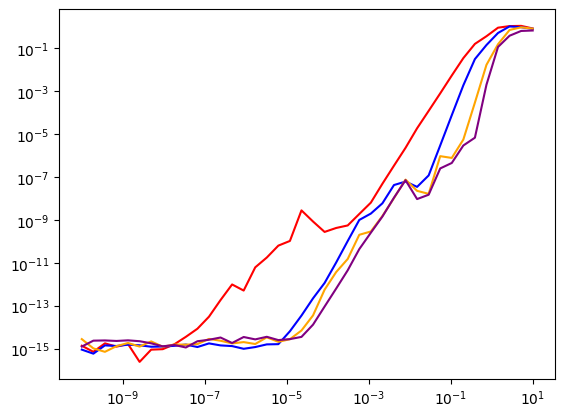

In [482]:
plt.plot(ts, errs_2, color='red')
#plt.plot(ts, t_errsL6_3, color='blue', ls='--')
plt.plot(ts, errs_3, color='blue')
plt.plot(ts, errs_5, color='orange')
#plt.plot(ts, errs_2, color='red')
plt.plot(ts, errs_6, color='purple')
#plt.plot(ts, errs_9, color='pink')



plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-6, 1.5])

In [584]:
import numpy as np

def random_unitary(n=4):
    """
    Generate a random n x n unitary matrix using QR decomposition.
    Default is 4x4.
    """
    # Random complex Gaussian matrix
    Z = (np.random.randn(n, n) + 1j * np.random.randn(n, n)) / np.sqrt(2)
    
    # QR decomposition
    Q, R = np.linalg.qr(Z)
    
    # Normalize phases to ensure unitarity
    D = np.diag(R)
    L = np.diag(D / np.abs(D))
    
    return Q @ L

In [ ]:
L = 4
rs = 10

latt = qib.lattice.IntegerLattice((L, ), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
J, h, g = (1, 0, 3)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()

    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V2 = scipy.linalg.expm(-1j*t*hloc)
Vlist_reduced_2 = [V2, V2]
perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V1 = scipy.linalg.expm(-1j*t*hloc/2)
V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/4)
V2 = scipy.linalg.expm(-1j*t*hloc/2)
Vlist_reduced_6 = [V1, V2, V1]*2
perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/6)
V2 = scipy.linalg.expm(-1j*t*hloc/3)
Vlist_reduced_9 = [V1, V2, V1]*3
perms_9 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_9))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/8)
V2 = scipy.linalg.expm(-1j*t*hloc/4)
Vlist_reduced_12 = [V1, V2, V1]*4
perms_12 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_12))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/10)
V2 = scipy.linalg.expm(-1j*t*hloc/5)
Vlist_reduced_15 = [V1, V2, V1]*5
perms_15 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_15))]

In [957]:
errs_2_L6 = []
errs_3_L6 = []
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=20)
    errs_2_L6.append(err_iter[-1])
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=50)
    errs_3_L6.append(err_iter[-1])

Current error:  0.7423657890768046
Current error:  0.7388075546935855
Current error:  0.7319058614337485
Current error:  0.7189731654174464
Current error:  0.696622988959109
Current error:  0.6748286791247085
Current error:  0.6585903147431709
Current error:  0.6465178959929025
Current error:  0.6378608291220156
Current error:  0.6324955214164681
Current error:  0.6303059592877329
Current error:  0.6302869832102534
Current error:  0.6302919471739796
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.772545593697036
Current error:  0.7678168969711131
Current error:  0.7585199162056551
Current error:  0.7405993726925673
Current error:  0.7076913423177056
Current error:  0.6725601798959736
Current error:  0.6444633239464526
Current error:  0.6232

In [963]:
errs_6_L6 = [1.865414376582774e-09]
for t in [100]:
    Vlist6, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=200)
    errs_6_L6.append(err_iter[-1])

Current error:  0.6520710707747777
Current error:  0.6470465550245288
Current error:  0.6373834765727308
Current error:  0.6196430488712367
Current error:  0.590648988831137
Current error:  0.5648310696171144
Current error:  0.5438602795610188
Current error:  0.5229386471206479
Current error:  0.5080213953026772
Current error:  0.4837884336092316
Current error:  0.468073901913422
Current error:  0.446038703837213
Current error:  0.4314413018354647
Current error:  0.41531729666894635
Current error:  0.4046627769788488
Current error:  0.39588197326090296
Current error:  0.39103717910780744
Current error:  0.3826408056153701
Current error:  0.3783232342139701
Current error:  0.3699808914496342
Current error:  0.3645097316137765
Current error:  0.35614422848869004
Current error:  0.3494721559272441
Current error:  0.3411470307785799
Current error:  0.3343011181526895
Current error:  0.3260610163123211
Current error:  0.31946458371739384
Current error:  0.31141629209115923
Current error:  0

In [964]:
errs_9_L6 = []    
for t in [100]:
    Vlist9, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9_L6.append(err_iter[-1])

Current error:  1.0375127274753315
Current error:  1.0298132712424661
Current error:  1.0144417602278257
Current error:  0.9838447537253467
Current error:  0.9235279348697908
Current error:  0.8504801523299829
Current error:  0.7812952450349804
Current error:  0.7172025708535344
Current error:  0.6587897306743816
Current error:  0.6058100870001965
Current error:  0.55724489806491
Current error:  0.5117802433301254
Current error:  0.4683681912356182
Current error:  0.4265942634446411
Current error:  0.3866656485905814
Current error:  0.355647895638673
Current error:  0.31781858049794387
Current error:  0.29018462570892645
Current error:  0.26233617614666255
Current error:  0.24174476129143868
Current error:  0.22164277130202353
Current error:  0.20731437599139696
Current error:  0.1882641797769634
Current error:  0.17347802791286396
Current error:  0.15811653089974947
Current error:  0.1462197211745217
Current error:  0.13691835578265563
Current error:  0.1304186959828733
Current error:

In [ ]:
errs_12_L6 = []    
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_12, perms_12, rS=rS, niter=niter)
    errs_12_L6.append(err_iter[-1])

In [ ]:
errs_15_L6 = []    
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_15, perms_15, rS=rS, niter=niter)
    errs_15_L6.append(err_iter[-1])

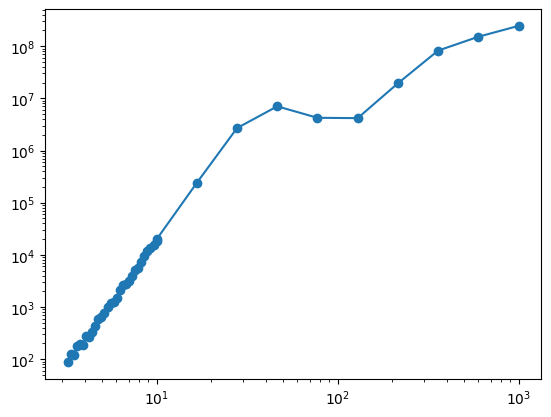

In [868]:
ts = list(np.logspace(-3, -1, num=10))+list(np.logspace(-1, 0, num=60)[:30])
plt.plot([1/t for t in ts], [1/eps for eps in errs_3])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3])


plt.xscale('log')
plt.yscale('log')

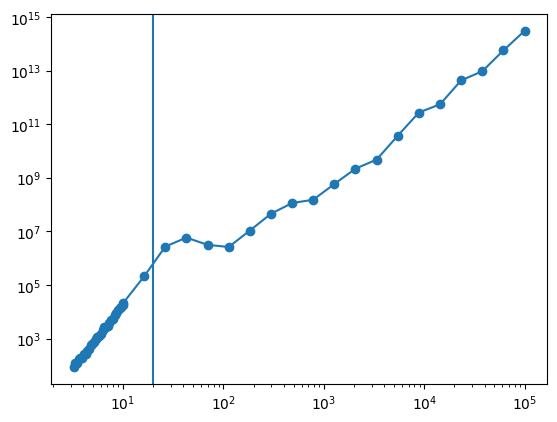

In [893]:
ts = list(np.logspace(-5, -1, num=20)) + ts_long
plt.plot([1/t for t in ts], [1/eps for eps in errs_3_L6_lT[-20:]+errs_3[10:]])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3_L6_lT[-20:]+errs_3[10:]])

plt.axvline(1/0.05)

plt.xscale('log')
plt.yscale('log')

In [887]:
ts

[1e-05,
 1.623776739188721e-05,
 2.6366508987303556e-05,
 4.281332398719396e-05,
 6.951927961775606e-05,
 0.00011288378916846884,
 0.00018329807108324357,
 0.00029763514416313193,
 0.0004832930238571752,
 0.0007847599703514606,
 0.0012742749857031334,
 0.00206913808111479,
 0.003359818286283781,
 0.005455594781168515,
 0.008858667904100823,
 0.01438449888287663,
 0.023357214690901212,
 0.03792690190732246,
 0.06158482110660261,
 0.1,
 0.1,
 0.103979841848149,
 0.1081180751076608,
 0.11242100350620865,
 0.11689518164985782,
 0.12154742500762866,
 0.1263848202934298,
 0.13141473626117564,
 0.13664483492953255,
 0.14208308325339222,
 0.1477377652598511,
 0.1536174946671828,
 0.15973122800602543,
 0.16608827826277153,
 0.1726983290659435,
 0.179571449437164,
 0.18671810912919196,
 0.19414919457438812,
 0.2018760254679039,
 0.20991037201085547,
 0.21826447283974873,
 0.22695105366946683,
 0.23598334667821944,
 0.2453751106639818,
 0.25514065200312885,
 0.26529484644318957,
 0.27585316176291

In [888]:
errs_3_L6_lT[-20:]+errs_3[10:]

[3.2985333429364008e-15,
 1.7621301692770387e-14,
 1.0566987121293463e-13,
 2.312081283374923e-13,
 1.8089936826481976e-12,
 3.656492745082004e-12,
 2.6824299399426765e-11,
 2.0877521721181314e-10,
 4.5469640834005936e-10,
 1.700075588601715e-09,
 6.55130859376472e-09,
 8.710200403088149e-09,
 2.19472286856222e-08,
 9.276851443320851e-08,
 3.803499947680111e-07,
 3.1594503733610073e-07,
 1.6938825137755418e-07,
 3.6787404525632644e-07,
 4.718338500895129e-06,
 4.764315399304694e-05,
 5.4056746492464196e-05,
 6.59973363195585e-05,
 7.322748314527044e-05,
 8.376417235297168e-05,
 0.00010631334668894895,
 0.00013457389022666593,
 0.00017878559356745386,
 0.00019330850388761382,
 0.00025512826474295925,
 0.00032354733932482744,
 0.0003599139261550829,
 0.0003714130826083525,
 0.00046524734395400646,
 0.0006574538537761031,
 0.0007864604481180803,
 0.0008446382623765386,
 0.0010148304535704423,
 0.0012994588080556626,
 0.0015399983321503585,
 0.0017097871092920077,
 0.002329747414165504,
 0

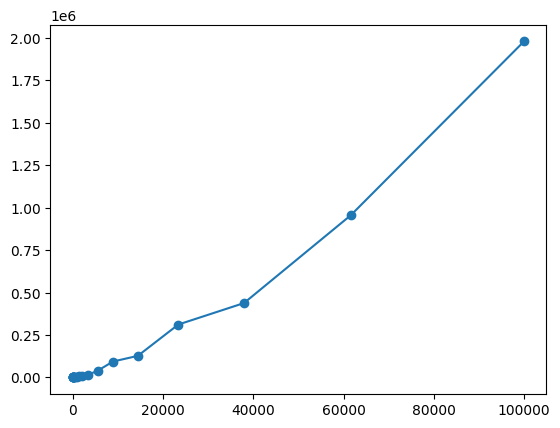

In [900]:
ts = list(np.logspace(-5, -1, num=20))
plt.plot([1/t for t in ts], [(1/eps)**(1/2.3) for eps in errs_3_L6_lT[-20:]])
plt.scatter([1/t for t in ts], [(1/eps)**(1/2.3) for eps in errs_3_L6_lT[-20:]])

#plt.xscale('log')
#plt.yscale('log')

In [896]:
list(np.logspace(-5, -1, num=20))

[1e-05,
 1.623776739188721e-05,
 2.6366508987303556e-05,
 4.281332398719396e-05,
 6.951927961775606e-05,
 0.00011288378916846884,
 0.00018329807108324357,
 0.00029763514416313193,
 0.0004832930238571752,
 0.0007847599703514606,
 0.0012742749857031334,
 0.00206913808111479,
 0.003359818286283781,
 0.005455594781168515,
 0.008858667904100823,
 0.01438449888287663,
 0.023357214690901212,
 0.03792690190732246,
 0.06158482110660261,
 0.1]

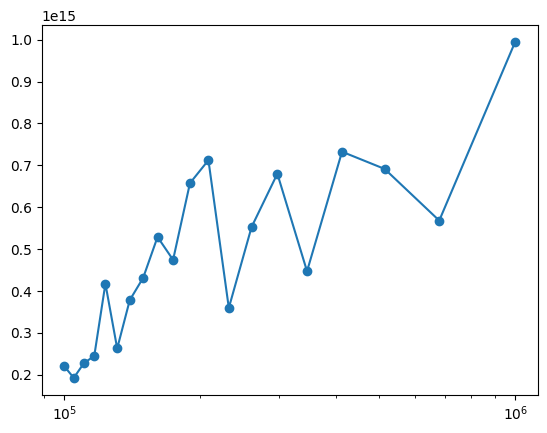

In [884]:
ts = np.linspace(1e-6, 1e-5, 20)
plt.plot([1/t for t in ts], [1/eps for eps in errs_3_L6_])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3_L6_])


plt.xscale('log')
#plt.yscale('log')